In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
import plotly.graph_objects as grpobj
from plotly.subplots import make_subplots
import plotly.express as px
import plotly

The dataset is taken from : https://www.kaggle.com/imdevskp/corona-virus-report 

The dataset folder contains 6 .csv files out of which 2 are used for analysis in this project. Some files may contain redundant data and hence are not used.

In [13]:
df = pd.read_csv("country_wise_latest.csv")

In [14]:
df.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [15]:
df.shape

(187, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [17]:
#checking for missing values
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [18]:
#getting the statistical measures of the dataset
df.describe()

Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635            3.454302              26.287694   
min       0.000000       0.000000            0.000000               0.000000   
25%       0.000000       0.000000            0.945000              48.770000   
50%       1.000000      22.000000            2.150000              71.320000   
75%       6.000000     221.000000            3.875000              86.885000   
max    1076.000000   33728.000000           28.560000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count                  187.00         1.870000e+02     187.000000   
mean                      inf         7.868248e+04    9448.459893   
std                       NaN         3.382737e+05   47491.127684   
min                      0.00         1.000000e+01     -47.000000   
25%                      1.45         1.051500e+03      49.000000   
50%                      3.62         5.020000e+03     432.000000   
75%                      6.44         3.708050e+04    3172.000000   
max                       inf         3.834677e+06  455582.000000   

       1 week % increase  
count         187.000000  
mean           13.606203  
std            24.509838  
min            -3.840000  
25%             2.775000  
50%             6.890000  
75%            16.855000  
max           226.320000

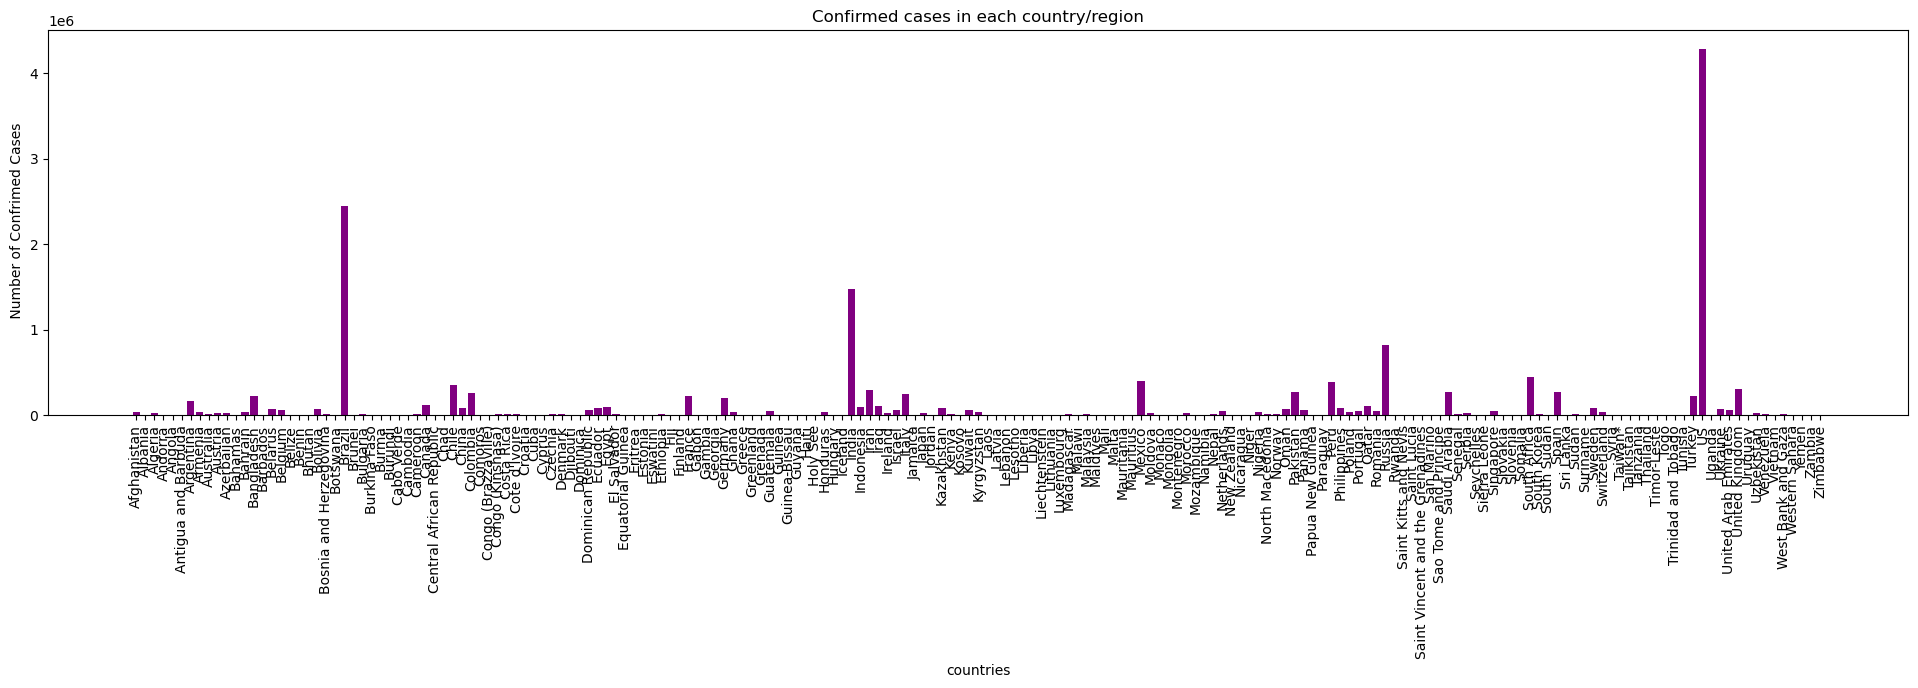

In [20]:
# confirmed cases in each region/country
plt.figure(figsize = (24,5))
plt.bar(df['Country/Region'], df['Confirmed'], align = 'center', color = 'purple')
plt.title("Confirmed cases in each country/region")
plt.xlabel("countries")
plt.ylabel(" Number of Confrimed Cases")
plt.xticks(rotation = 90)
plt.savefig("Confirmed cases in each country.png") #do not include special symbols in image name, it causes FileNotFound error
plt.show()

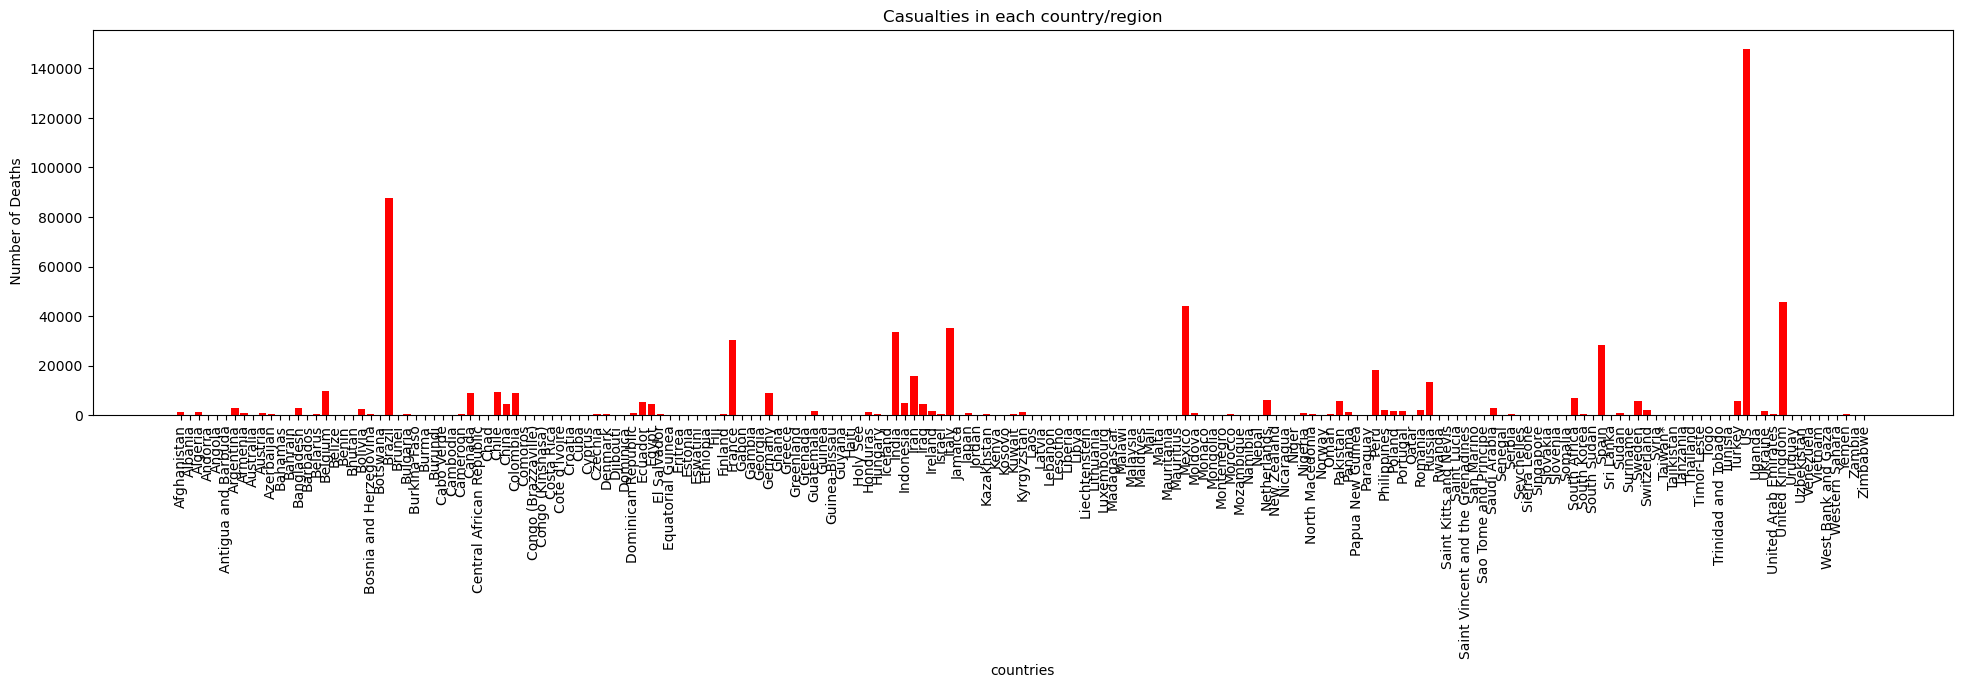

In [21]:
#deaths in each country
plt.figure(figsize = (24,5))
plt.bar(df['Country/Region'], df['Deaths'], align = 'center', color = 'red')
plt.title("Casualties in each country/region")
plt.xlabel("countries")
plt.ylabel(" Number of Deaths")
plt.xticks(rotation = 90)
plt.savefig("Casualties in ech country.png")
plt.show()

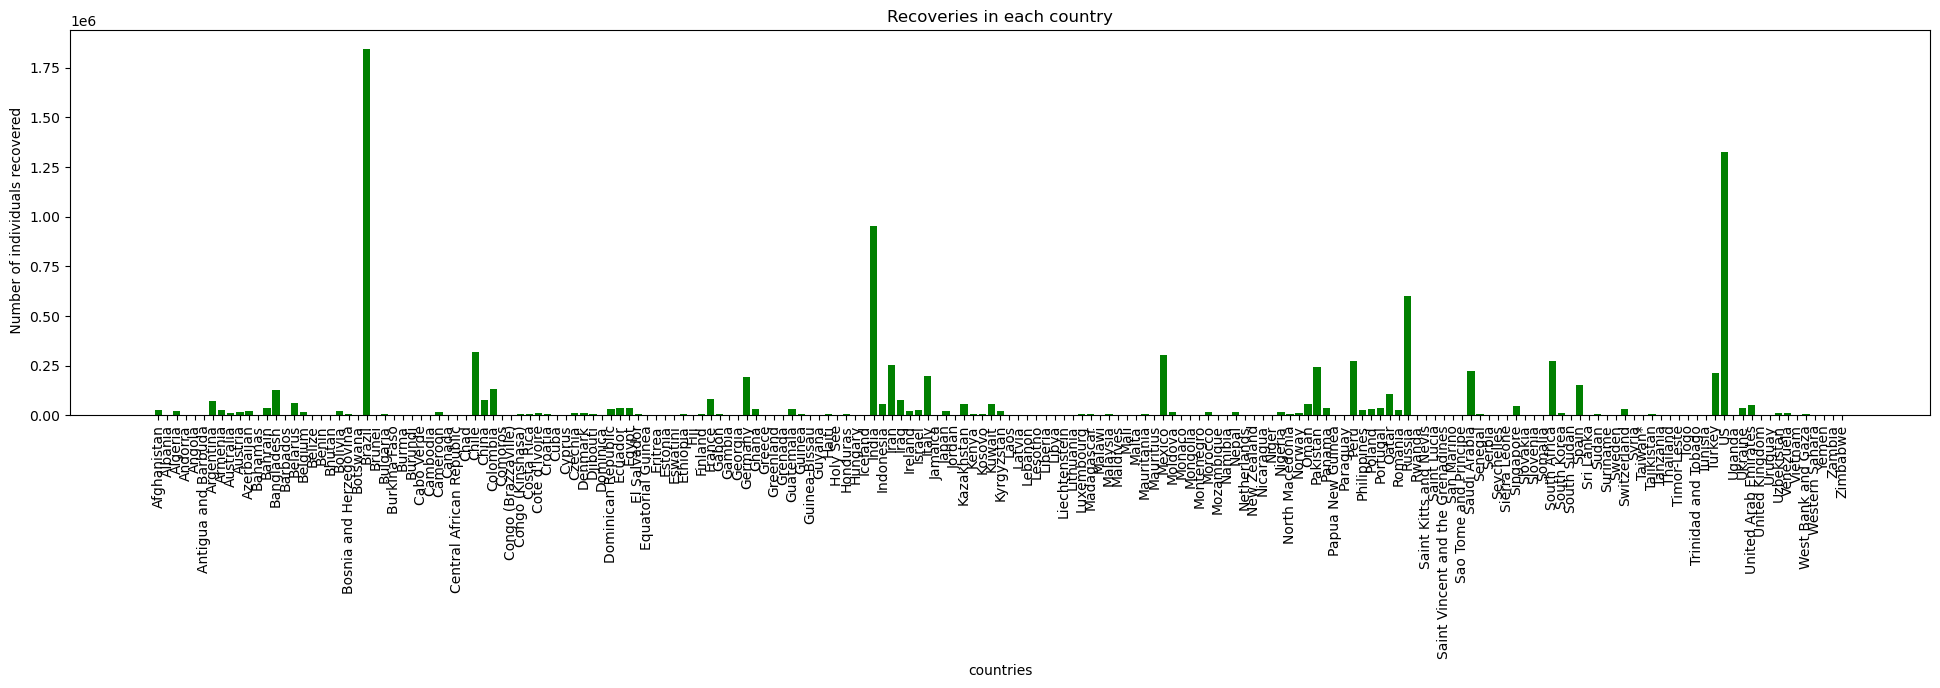

In [22]:
#Recovered individuals in each country
plt.figure(figsize = (24,5))
plt.bar(df['Country/Region'], df['Recovered'], align = 'center', color = 'green')
plt.title("Recoveries in each country")
plt.xlabel("countries")
plt.ylabel(" Number of individuals recovered")
plt.xticks(rotation = 90)
plt.savefig("Recoveries in each country.png")
plt.show()

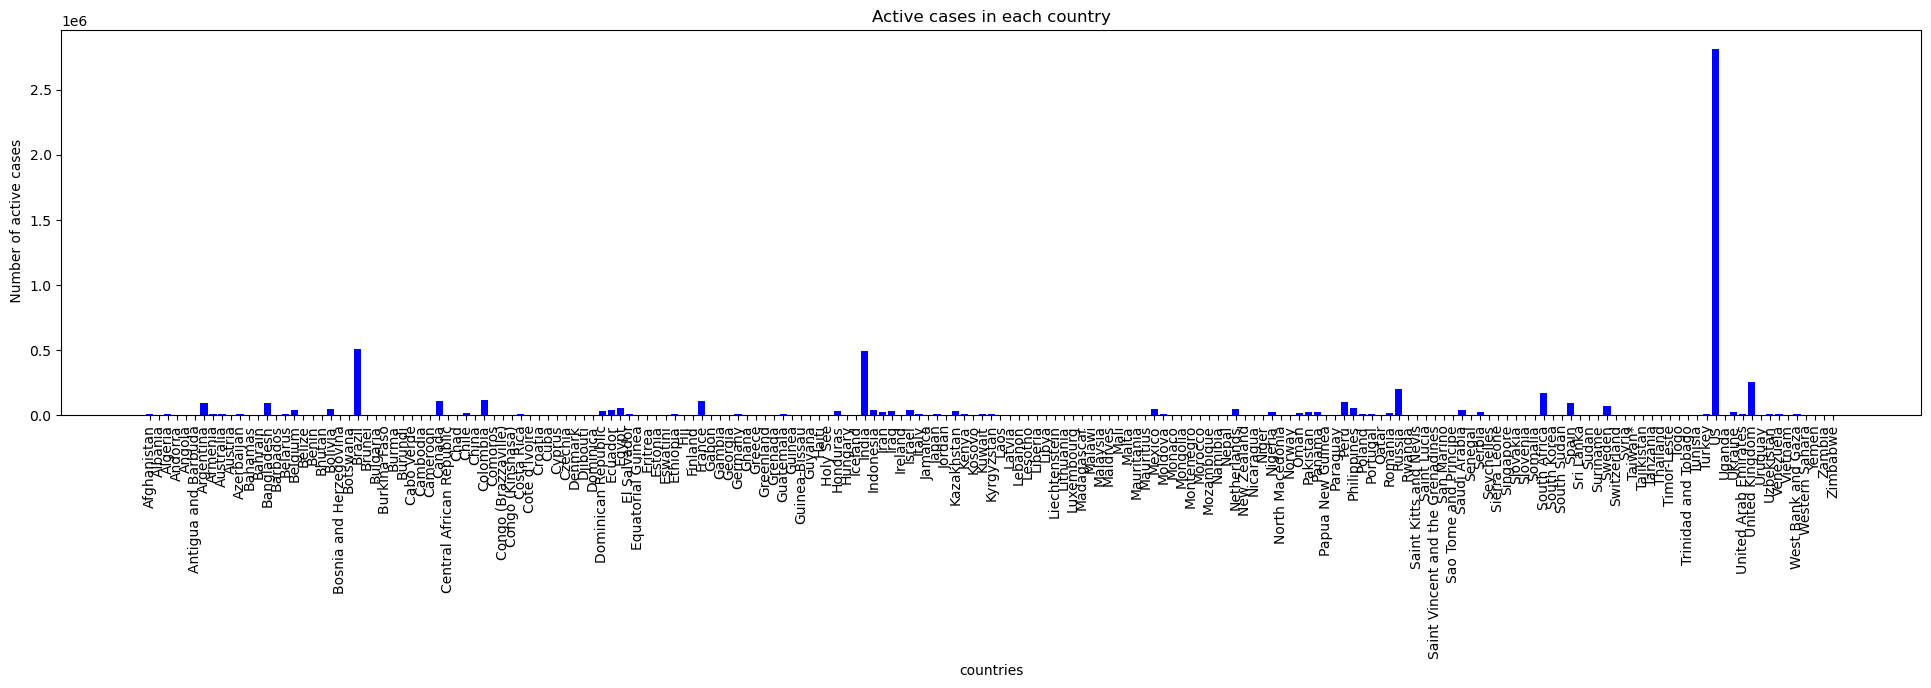

In [23]:
#active cases in each country
plt.figure(figsize = (24,5))
plt.bar(df['Country/Region'], df['Active'], align = 'center', color = 'blue')
plt.title("Active cases in each country")
plt.xlabel("countries")
plt.ylabel(" Number of active cases")
plt.xticks(rotation = 90)
plt.savefig("Active cases in each country.png")
plt.show()

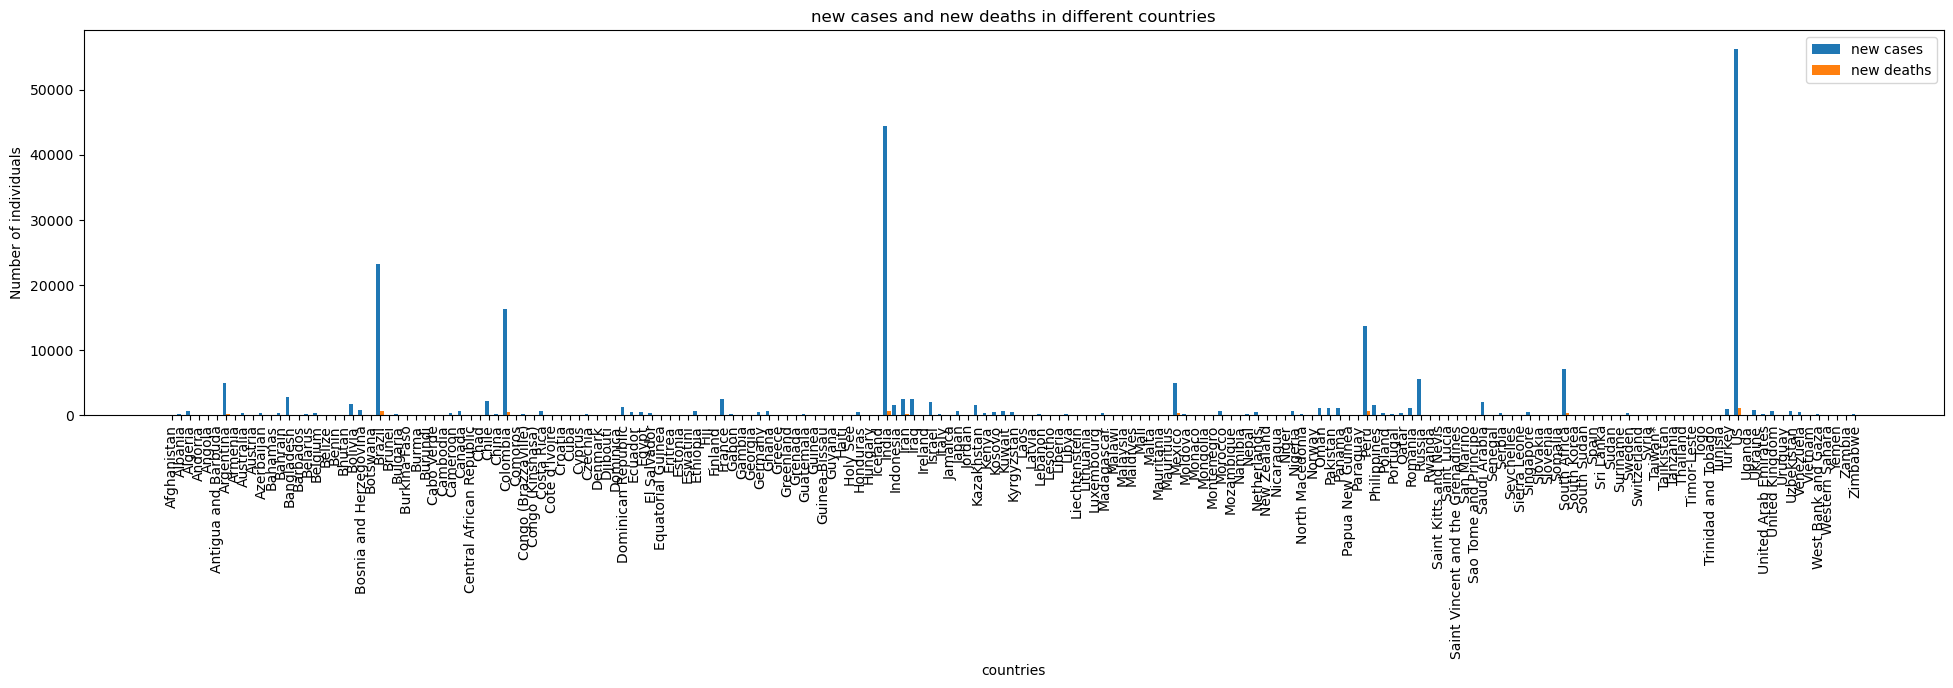

In [24]:
#new cases and new deaths in each country

plt.figure(figsize = (24,5))
x = df['Country/Region']
y= df['New cases'] #label = new cases
z= df['New deaths'] #label = new Deaths

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y, width = 0.4 , label = "new cases")
plt.bar(x_axis + 0.2, z, width = 0.4, label = "new deaths")

plt.xticks(x_axis, x, rotation = 90)
plt.xlabel("countries")
plt.ylabel("Number of individuals")
plt.title("new cases and new deaths in different countries")
plt.legend()
plt.savefig("New Cases and New Deaths in Different Countries.png")
plt.show()

In [27]:
# Top 10 confirmed countries (Bubble plot)

top10_confirmed = pd.DataFrame(df.groupby('Country/Region')['Confirmed'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top10_confirmed.index, title = 'Top 10 Confirmed Cases Countries')

fig1.show()

<Figure size 640x480 with 0 Axes>

In [28]:
# Top 10 countries with most deaths (h-Bar plot)

top10_deaths = pd.DataFrame(df.groupby('Country/Region')['Deaths'].sum().nlargest(10).sort_values(ascending = True))
fig2 = px.bar(top10_deaths, x = 'Deaths', y = top10_deaths.index, height = 600, color = 'Deaths', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 10 Death Cases Countries')

fig2.show()

<Figure size 640x480 with 0 Axes>

In [29]:
# Top 10 countries with most recoveries (Bar plot)

top10_recovered = pd.DataFrame(df.groupby('Country/Region')['Recovered'].sum().nlargest(10).sort_values(ascending = False))
fig3 = px.bar(top10_recovered, x = top10_recovered.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 10 Recovered Cases Countries', color_continuous_scale = px.colors.sequential.Viridis)

fig3.show()

<Figure size 640x480 with 0 Axes>

In [30]:
# Top 10 countries with most number of acitve cases

top10_active = pd.DataFrame(df.groupby('Country/Region')['Active'].sum().nlargest(10).sort_values(ascending = True))
fig4 = px.bar(top10_active, x = 'Active', y = top10_active.index, height = 600, color = 'Active', orientation = 'h',
             color_continuous_scale = ['paleturquoise','blue'], title = 'Top 10 Active Cases Countries')

fig4.show()

<Figure size 640x480 with 0 Axes>

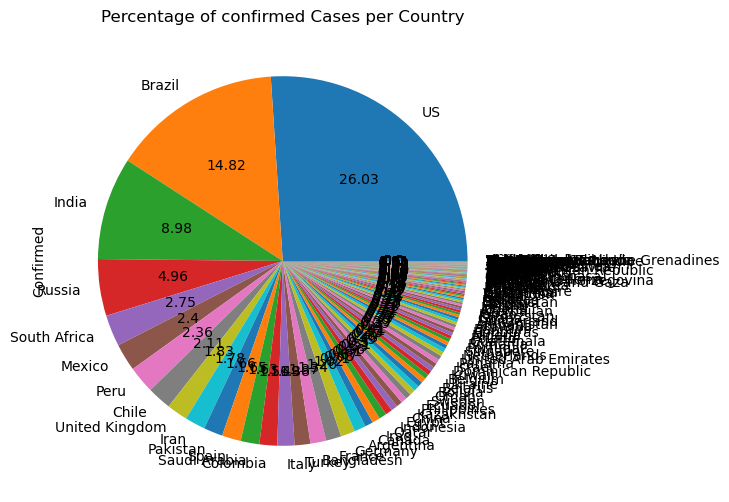

In [31]:
#percentage of confirmed cases per country

fig = plt.figure(figsize=(6,6))
confirmed_perCountry = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
sum_of_confirmed=df['Confirmed'].sum()
def absolute_value(val):
    x = val
    return (np.round(x,2))
confirmed_perCountry .plot(kind="pie",title='Percentage of confirmed Cases per Country',autopct=absolute_value)

plt.savefig("Percentage of Confirmed cases per country")
plt.show ()

In [51]:
#region wise classfifciation

who_regions = pd.DataFrame(df.groupby('WHO Region')['Confirmed'].sum())

label = who_regions.index
value = who_regions['Confirmed']

fig = grpobj.Figure(data=[grpobj.Pie(labels = label, values = value, pull=[0, 0, 0, 0, 0.1, 0.05])])

fig.update_layout(title = 'WHO Region wise Confrimed Case Distribution',title_y=0.01,
                   margin = dict(t = 0, l = 0, r = 0, b = 0))

fig.show()


In [34]:
#distribution data for most affected countries

case_distribution = df

# US
dist_us = case_distribution['Country/Region'] == 'US'
dist_us = case_distribution[dist_us][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# Brazil
dist_brazil = case_distribution['Country/Region'] == 'Brazil'
dist_brazil = case_distribution[dist_brazil][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# India
dist_india = case_distribution['Country/Region'] == 'India'
dist_india = case_distribution[dist_india][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')

# Russia
dist_russia = case_distribution['Country/Region'] == 'Russia'
dist_russia = case_distribution[dist_russia][['Country/Region','Deaths','Recovered','Active']].set_index('Country/Region')


In [35]:
#converting individual dataframes to 1-D array

dist_us1 = dist_us.values.flatten()
dist_brazil1 = dist_brazil.values.flatten()
dist_india1 = dist_india.values.flatten()
dist_russia1 = dist_russia.values.flatten()

#this step is necessary as pie plot takes input values as 1-D array

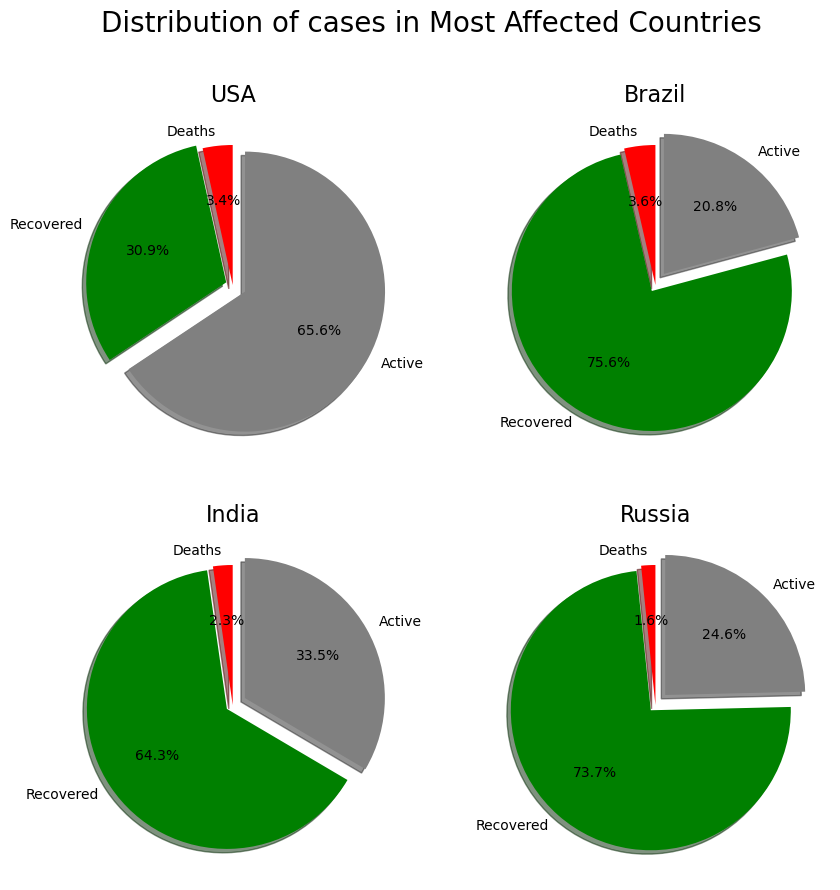

In [36]:
#plotting the pie charts

fig = plt.figure(figsize = (10,10))
colors_series = ['red','green','grey']
explode = (0,0.05,0.1)

plt.subplot(221)
plt.pie(dist_us1, labels = dist_us.columns, colors = colors_series, explode = explode,startangle = 90,
        autopct = '%.1f%%', shadow = True)
plt.title('USA', fontsize = 16)

plt.subplot(222)
plt.pie(dist_brazil1, labels = dist_brazil.columns, colors = colors_series, explode = explode,startangle = 90,autopct = '%.1f%%',
       shadow = True)
plt.title('Brazil', fontsize = 16)

plt.subplot(223)
plt.pie(dist_india1, labels = dist_india.columns, colors = colors_series, explode = explode, startangle = 90, autopct = '%.1f%%',
       shadow = True)
plt.title('India', fontsize = 16)

plt.subplot(224)
plt.pie(dist_russia1, labels = dist_russia.columns, colors = colors_series, explode = explode, startangle = 90,
        autopct = '%.1f%%', shadow = True)
plt.title('Russia', fontsize = 16)

plt.suptitle('Distribution of cases in Most Affected Countries', fontsize = 20)

plt.savefig("Distribution of cases in most affected Countries.png")
plt.show()

#### Using another dataset i.e. 'day_wise.csv' for further analysis.

In [37]:
time_series = pd.read_csv('day_wise.csv')
time_series['Date'] = pd.to_datetime(time_series['Date'])

In [38]:
time_series_dates = time_series.groupby('Date').sum()
time_series_dates

Confirmed  Deaths  Recovered   Active  New cases  New deaths  \
Date                                                                       
2020-01-22        555      17         28      510          0           0   
2020-01-23        654      18         30      606         99           1   
2020-01-24        941      26         36      879        287           8   
2020-01-25       1434      42         39     1353        493          16   
2020-01-26       2118      56         52     2010        684          14   
...               ...     ...        ...      ...        ...         ...   
2020-07-23   15510481  633506    8710969  6166006     282756        9966   
2020-07-24   15791645  639650    8939705  6212290     281164        6144   
2020-07-25   16047190  644517    9158743  6243930     255545        4867   
2020-07-26   16251796  648621    9293464  6309711     204606        4104   
2020-07-27   16480485  654036    9468087  6358362     228693        5415   

            New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
Date                                                                   
2020-01-22              0                3.06                   5.05   
2020-01-23              2                2.75                   4.59   
2020-01-24              6                2.76                   3.83   
2020-01-25              3                2.93                   2.72   
2020-01-26             13                2.64                   2.46   
...                   ...                 ...                    ...   
2020-07-23         169714                4.08                  56.16   
2020-07-24         228736                4.05                  56.61   
2020-07-25         219038                4.02                  57.07   
2020-07-26         134721                3.99                  57.18   
2020-07-27         174623                3.97                  57.45   

            Deaths / 100 Recovered  No. of countries  
Date                                                  
2020-01-22                   60.71                 6  
2020-01-23                   60.00                 8  
2020-01-24                   72.22                 9  
2020-01-25                  107.69                11  
2020-01-26                  107.69                13  
...                            ...               ...  
2020-07-23                    7.27               187  
2020-07-24                    7.16               187  
2020-07-25                    7.04               187  
2020-07-26                    6.98               187  
2020-07-27                    6.91               187  

[188 rows x 11 columns]

In [39]:
#cumulative Confirmed cases

fig = grpobj.Figure()
fig.add_trace(grpobj.Scatter(x = time_series_dates.index, y = time_series_dates['Confirmed'], fill = 'tonexty',
                          line_color = 'blue'))
fig.update_layout(title = 'Cumulative Confirmed Cases Worldwide')

fig.show()

<Figure size 640x480 with 0 Axes>

In [40]:
#cumulative deaths worldwide

fig = grpobj.Figure()
fig.add_trace(grpobj.Scatter(x = time_series_dates.index, y = time_series_dates['Deaths'], fill = 'tonexty',
                          line_color = 'red'))
fig.update_layout(title = 'Cumulative Deaths Worldwide')

fig.show()

<Figure size 640x480 with 0 Axes>

In [41]:
# cumulative recovered cases worldwide
fig = grpobj.Figure()
fig.add_trace(grpobj.Scatter(x = time_series_dates.index, y = time_series_dates['Recovered'], fill = 'tonexty',
                          line_color = 'green'))
fig.update_layout(title = 'Cumulative Recovered Cases Worldwide')

fig.show()

<Figure size 640x480 with 0 Axes>

In [42]:
#cumulatie active cases worldwide

fig = grpobj.Figure()
fig.add_trace(grpobj.Scatter(x = time_series_dates.index, y = time_series_dates['Active'], fill = 'tonexty',
                          line_color = 'blue'))
fig.update_layout(title = 'Cumulative Active Cases Worldwide')

fig.show()

<Figure size 640x480 with 0 Axes>

In [43]:
#daily new cases worldwide

fig = grpobj.Figure()
fig.add_trace(grpobj.Scatter(x = time_series_dates.index, y = time_series_dates['New cases'], fill = 'tonexty',
                          line_color = 'gold'))
fig.update_layout(title = 'Daily New Cases Worldwide')

fig.show()

<Figure size 640x480 with 0 Axes>

In [44]:
#new deaths worldwide

fig = grpobj.Figure()
fig.add_trace(grpobj.Scatter(x = time_series_dates.index, y = time_series_dates['New deaths'], fill = 'tonexty',
                          line_color = 'grey'))
fig.update_layout(title = 'New Casualties Worldwide')

fig.show()

<Figure size 640x480 with 0 Axes>